In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.backends.backend_pdf import PdfPages
from scipy.interpolate import UnivariateSpline

In [17]:
# Enable interactive mode
plt.ion()

# Load the CSV file
data = pd.read_csv('Fitted_FC_TmpDpn_RD_StrRt0.001_ref.csv')
csv_output_path = 'Parameters_TmpDpn_RD_StrRt0.001_sample.csv'

In [33]:
# Temperature data points
#T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])
T = np.array([298.15, 373.15, 473.15, 573.15, 673.15])

# Define the function with two Gaussians
def double_gaussian_func(T, C1, C2, C3, C4, C5, C6, C7, C8, C9):
    return (C1 * np.exp(-C2 * T) + C3 +
            C4 * np.exp(-((T - C5) / C6)**2) +
            C7 * np.exp(-((T - C8) / C9)**2))

# List of indices for the rows to process (from 1 to 305)
#indices = np.arange(1, 306)
indices = np.array([1,2,3, 4, 5, 6, 10,11,14,15,20,25,30,35,40,45,50,100,200,230,250,270,280,290,300,310])

# Initialize a dictionary to store fitted parameters and a list to collect data for the CSV
fitted_parameters = []
pdf_pages = PdfPages('Fitted_FC_TmpDpn_RD_StrRt0.001_sample.pdf')

# Loop through specified rows and perform fitting
for j, i in enumerate(indices):
    if i != 0:
        # Extract stress data from row `i`, starting from the 7th column to the end
        stress = data.iloc[i, 6:].values
        
        # Set adaptive bounds based on the input data characteristics
        bounds = (
            [0, 0.00001, np.min(stress) * 0.5, 0, np.min(T), 10, 0, np.min(T), 10],  # Lower bounds
            [np.max(stress) * 2, 0.01, np.max(stress), 10, np.max(T), 200, np.max(stress), np.max(T), 200]  # Upper bounds
        )
        
        # Perform the curve fitting without an initial guess
        try:
            params, _ = curve_fit(double_gaussian_func, T, stress, bounds=bounds, max_nfev=10000)
        except RuntimeError:
            print(f"Could not fit row {i}")
            continue
        
        # Collect the parameters for saving in the CSV file
        fitted_parameters.append([data.iloc[i, 0], *params])

        # Generate data for the fit curve
        T_fit = np.linspace(np.min(T), np.max(T), 100)
        stress_fit = double_gaussian_func(T_fit, *params)
        
        # Calculate residuals for error estimation
        residuals = stress - double_gaussian_func(T, *params)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((stress - np.mean(stress))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        # Plot the original data and the fitted curve
        plt.figure()
        plt.plot(T, stress, 'o', label='Data')
        plt.plot(T_fit, stress_fit, '-', label='Fit')
        plt.xlabel('Temperature (K)')
        plt.ylabel('Stress')
        plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
        plt.legend([
            f'PEEQ={data.iloc[i, 0]:.5f}\n'
            f'Fit: C1={params[0]:.3f}, C2={params[1]:.3f}, C3={params[2]:.3f},\n'
            f'C4={params[3]:.3f}, C5={params[4]:.3f}, C6={params[5]:.3f},\n'
            f'C7={params[6]:.3f}, C8={params[7]:.3f}, C9={params[8]:.3f}'
        ])
        
        # Save the current figure to the PDF
        pdf_pages.savefig()
        plt.close()

# Close the PDF file
pdf_pages.close()

# Save the parameters to a CSV file
csv_output_path = 'Fitted_Parameters_StrRt0.001_sample.csv'
columns = ['PEEQ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
fitted_parameters_df = pd.DataFrame(fitted_parameters, columns=columns)
fitted_parameters_df.to_csv(csv_output_path, index=False)
print("Modified plots saved")
print("Fitted parameters saved")

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Modified plots saved
Fitted parameters saved


In [41]:
# Load the CSV file
data = pd.read_csv('Fitted_FC_TmpDpn_RD_StrRt0.01_ref.csv')
csv_output_path = 'Parameters_TmpDpn_RD_StrRt0.01.csv'

In [42]:
# Temperature data points
#T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])
T = np.array([298.15, 373.15, 473.15, 573.15, 673.15])

# Define the function with two Gaussians
def double_gaussian_func(T, C1, C2, C3, C4, C5, C6, C7, C8, C9):
    return (C1 * np.exp(-C2 * T) + C3 +
            C4 * np.exp(-((T - C5) / C6)**2) +
            C7 * np.exp(-((T - C8) / C9)**2))

# List of indices for the rows to process (from 1 to 305)
indices = np.arange(1, 306)
#indices = np.array([1,2,3, 4, 5, 6, 10,11,14,15,20,25,30,35,40,45,50,100,200,230,250,270,280,290,300,310])

# Initialize a dictionary to store fitted parameters and a list to collect data for the CSV
fitted_parameters = []
pdf_pages = PdfPages('Fitted_FC_TmpDpn_RD_StrRt0.01.pdf')

# Loop through specified rows and perform fitting
for j, i in enumerate(indices):
    if i != 0:
        # Extract stress data from row `i`, starting from the 7th column to the end
        stress = data.iloc[i, 6:].values
        
        # Set adaptive bounds based on the input data characteristics
        bounds = (
            [0, 0.00001, np.min(stress) * 0.5, 0, np.min(T), 10, 0, np.min(T), 10],  # Lower bounds
            [np.max(stress) * 2, 0.01, np.max(stress), 10, np.max(T), 200, np.max(stress), np.max(T), 200]  # Upper bounds
        )
        
        # Perform the curve fitting without an initial guess
        try:
            params, _ = curve_fit(double_gaussian_func, T, stress, bounds=bounds, max_nfev=10000)
        except RuntimeError:
            print(f"Could not fit row {i}")
            continue
        
        # Collect the parameters for saving in the CSV file
        fitted_parameters.append([data.iloc[i, 0], *params])

        # Generate data for the fit curve
        T_fit = np.linspace(np.min(T), np.max(T), 100)
        stress_fit = double_gaussian_func(T_fit, *params)
        
        # Calculate residuals for error estimation
        residuals = stress - double_gaussian_func(T, *params)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((stress - np.mean(stress))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        # Plot the original data and the fitted curve
        plt.figure()
        plt.plot(T, stress, 'o', label='Data')
        plt.plot(T_fit, stress_fit, '-', label='Fit')
        plt.xlabel('Temperature (K)')
        plt.ylabel('Stress')
        plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
        plt.legend([
            f'PEEQ={data.iloc[i, 0]:.5f}\n'
            f'Fit: C1={params[0]:.3f}, C2={params[1]:.3f}, C3={params[2]:.3f},\n'
            f'C4={params[3]:.3f}, C5={params[4]:.3f}, C6={params[5]:.3f},\n'
            f'C7={params[6]:.3f}, C8={params[7]:.3f}, C9={params[8]:.3f}'
        ])
        
        # Save the current figure to the PDF
        pdf_pages.savefig()
        plt.close()

# Close the PDF file
pdf_pages.close()

# Save the parameters to a CSV file
columns = ['PEEQ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
fitted_parameters_df = pd.DataFrame(fitted_parameters, columns=columns)
fitted_parameters_df.to_csv(csv_output_path, index=False)
print("Modified plots saved")
print("Fitted parameters saved")

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Modified plots saved
Fitted parameters saved


## Output: PDF file and Parameter csv

In [43]:
def fit_data_with_double_gaussian(file, T, indices, starting_column):
    data = pd.read_csv(f"{file}_ref.csv")
    output_pdf = f"{file}.pdf"
    csv_output_path = f'Parameters_{file}.csv'
    # Define the double Gaussian function
    def double_gaussian_func(T, C1, C2, C3, C4, C5, C6, C7, C8, C9):
        return (C1 * np.exp(-C2 * T) + C3 +
                C4 * np.exp(-((T - C5) / C6)**2) +
                C7 * np.exp(-((T - C8) / C9)**2))

    # Initialize a dictionary to store fitted parameters and a list to collect data for the CSV
    fitted_parameters = []
    pdf_pages = PdfPages(output_pdf)

    # Loop through specified rows and perform fitting
    for j, i in enumerate(indices):
        if i != 0:
            # Extract stress data from row `i`, starting from the specified starting column to the end
            stress = data.iloc[i, starting_column:].values

            # Set adaptive bounds based on the input data characteristics
            bounds = (
                [0, 0.00001, np.min(stress) * 0.5, 0, np.min(T), 10, 0, np.min(T), 10],  # Lower bounds
                [np.max(stress) * 2, 0.01, np.max(stress), 10, np.max(T), 200, np.max(stress), np.max(T), 200]  # Upper bounds
            )

            # Perform the curve fitting without an initial guess
            try:
                params, _ = curve_fit(double_gaussian_func, T, stress, bounds=bounds, max_nfev=10000)
            except RuntimeError:
                print(f"Could not fit row {i}")
                continue

            # Collect the parameters for saving in the CSV file
            fitted_parameters.append([data.iloc[i, 0], *params])

            # Generate data for the fit curve
            T_fit = np.linspace(np.min(T), np.max(T), 100)
            stress_fit = double_gaussian_func(T_fit, *params)

            # Calculate residuals for error estimation
            residuals = stress - double_gaussian_func(T, *params)
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((stress - np.mean(stress))**2)
            r_squared = 1 - (ss_res / ss_tot)

            # Plot the original data and the fitted curve
            plt.figure()
            plt.plot(T, stress, 'o', label='Data')
            plt.plot(T_fit, stress_fit, '-', label='Fit')
            plt.xlabel('Temperature (K)')
            plt.ylabel('Stress')
            plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
            plt.legend([
                f'PEEQ={data.iloc[i, 0]:.5f}\n'
                f'Fit: C1={params[0]:.3f}, C2={params[1]:.3f}, C3={params[2]:.3f},\n'
                f'C4={params[3]:.3f}, C5={params[4]:.3f}, C6={params[5]:.3f},\n'
                f'C7={params[6]:.3f}, C8={params[7]:.3f}, C9={params[8]:.3f}'
            ])

            # Save the current figure to the PDF
            pdf_pages.savefig()
            plt.close()

    # Close the PDF file
    pdf_pages.close()

    # Save the parameters to a CSV file
    columns = ['PEEQ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
    fitted_parameters_df = pd.DataFrame(fitted_parameters, columns=columns)
    fitted_parameters_df.to_csv(csv_output_path, index=False)
    print(f"Modified plots saved as '{output_pdf}'")
    print(f"Fitted parameters saved to '{csv_output_path}'")


In [54]:
file_0001 = 'Fitted_FC_TmpDpn_RD_StrRt0.0001'
#T = np.array([298.15, 373.15, 473.15, 573.15, 673.15]) #other strain-rates
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15]) #0.0001
#indices = np.array([1,2,3, 4, 5, 6, 10,11,14,15,20,25,30,35,40,45,50,100,200,230,250,270,280,290,300,310])
indices = np.arange(1, 306)
#starting_column = 6 #other strain-rates
starting_column = 8 #0.0001

In [52]:
fit_data_with_double_gaussian(file_0001, T, indices, starting_column)

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Modified plots saved as 'Fitted_FC_TmpDpn_RD_StrRt0.001.pdf'
Fitted parameters saved to 'Parameters_Fitted_FC_TmpDpn_RD_StrRt0.001.csv'


## Output: fitted relative stress

In [67]:
def fit_data(file, T, indices, starting_column):
    data = pd.read_csv(f"{file}_ref.csv")
    output_pdf = f"{file}.pdf"
    csv_output_path = f'Parameters_{file}.csv'
    # Define the double Gaussian function
    def double_gaussian_func(T, C1, C2, C3, C4, C5, C6, C7, C8, C9):
        return (C1 * np.exp(-C2 * T) + C3 +
                C4 * np.exp(-((T - C5) / C6)**2) +
                C7 * np.exp(-((T - C8) / C9)**2))

    # Initialize a dictionary to store fitted parameters and a list to collect data for the CSV
    fitted_parameters = []

    # Loop through specified rows and perform fitting
    for j, i in enumerate(indices):
        if i != 0:
            # Extract stress data from row `i`, starting from the specified starting column to the end
            stress = data.iloc[i, starting_column:].values

            # Set adaptive bounds based on the input data characteristics
            bounds = (
                [0, 0.00001, np.min(stress) * 0.5, 0, np.min(T), 10, 0, np.min(T), 10],  # Lower bounds
                [np.max(stress) * 2, 0.01, np.max(stress), 10, np.max(T), 200, np.max(stress), np.max(T), 200]  # Upper bounds
            )

            # Perform the curve fitting without an initial guess
            try:
                params, _ = curve_fit(double_gaussian_func, T, stress, bounds=bounds, max_nfev=10000)
            except RuntimeError:
                print(f"Could not fit row {i}")
                continue

            # Collect the parameters for saving in the CSV file
            fitted_parameters.append([data.iloc[i, 0], *params])

            # Generate data for the fit curve and store it in the dictionary
            T_fit = np.linspace(np.min(T), np.max(T), 100)
            stress_fit = double_gaussian_func(T_fit, *params)
            stress_fit_data[i] = (T_fit, stress_fit)  # Store T_fit and stress_fit for this index

            # Calculate residuals for error estimation
            residuals = stress - double_gaussian_func(T, *params)
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((stress - np.mean(stress))**2)
            r_squared = 1 - (ss_res / ss_tot)
    return stress_fit_data

## Plot experimental data and fitted curve for all strain rates at a strain value

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


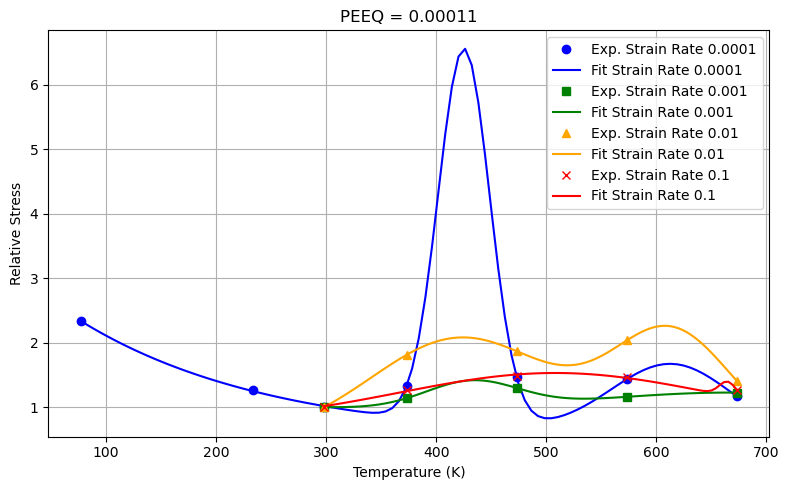

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


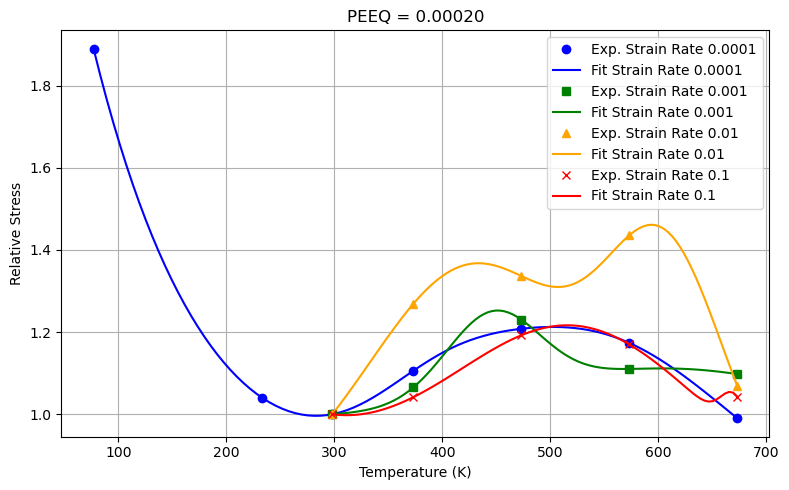

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


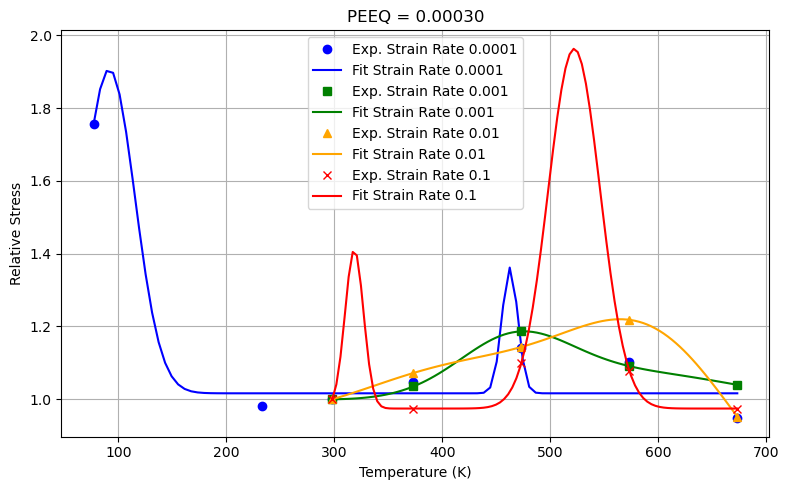

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


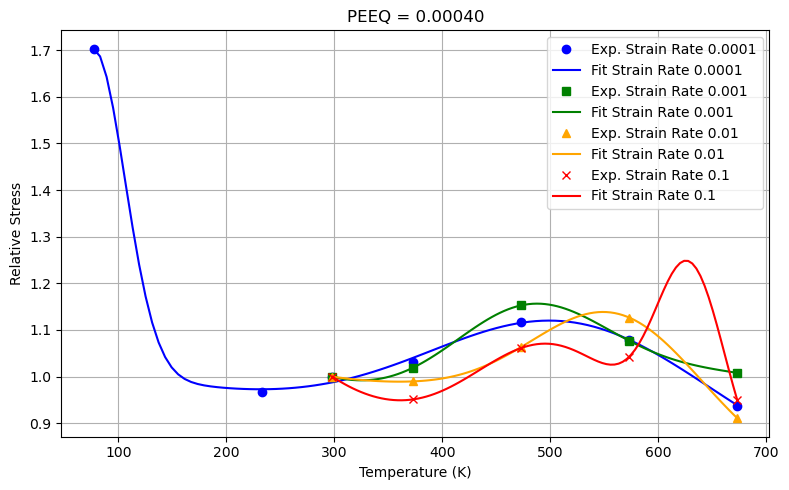

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


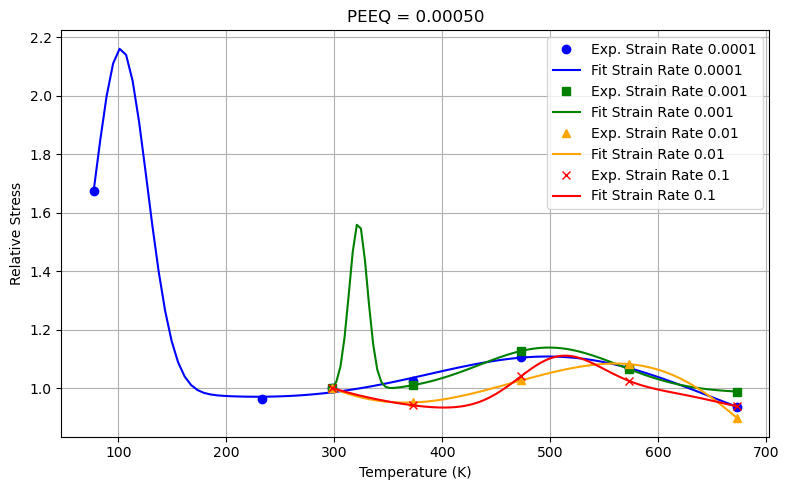

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


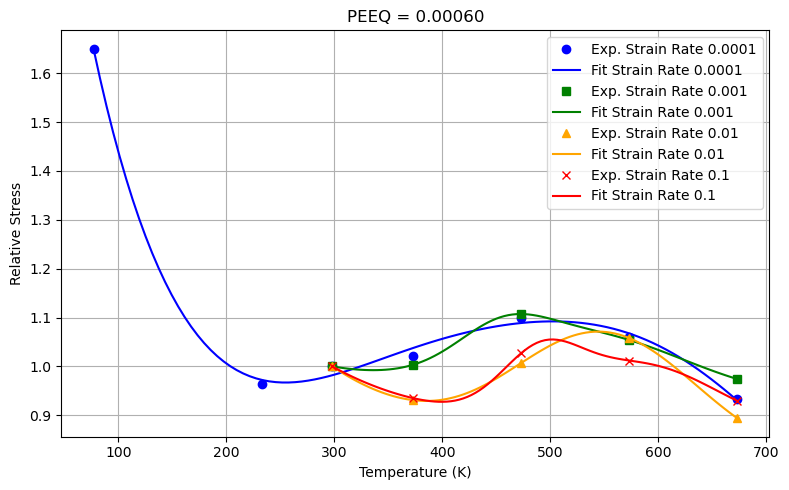

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


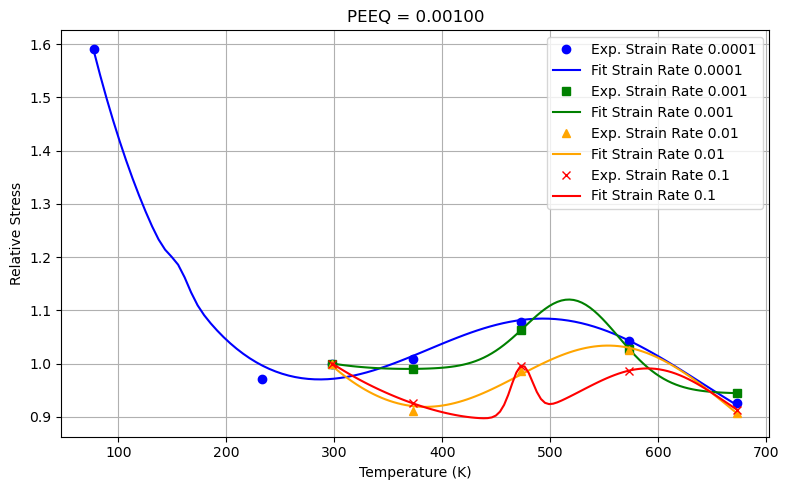

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


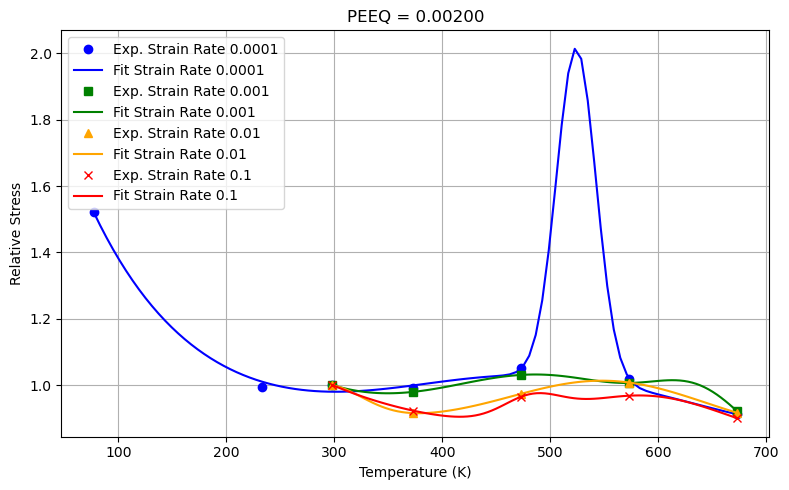

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


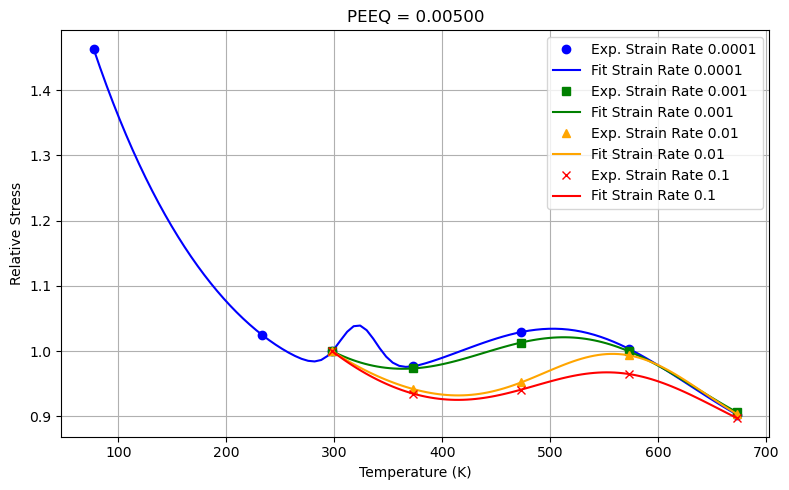

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


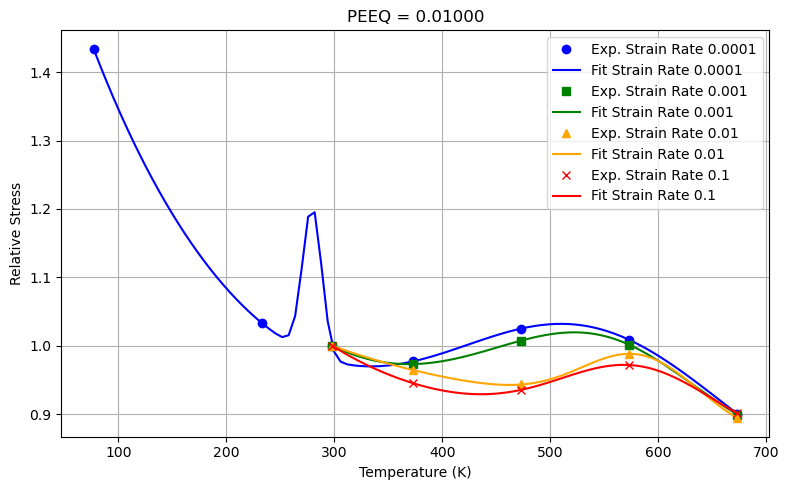

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


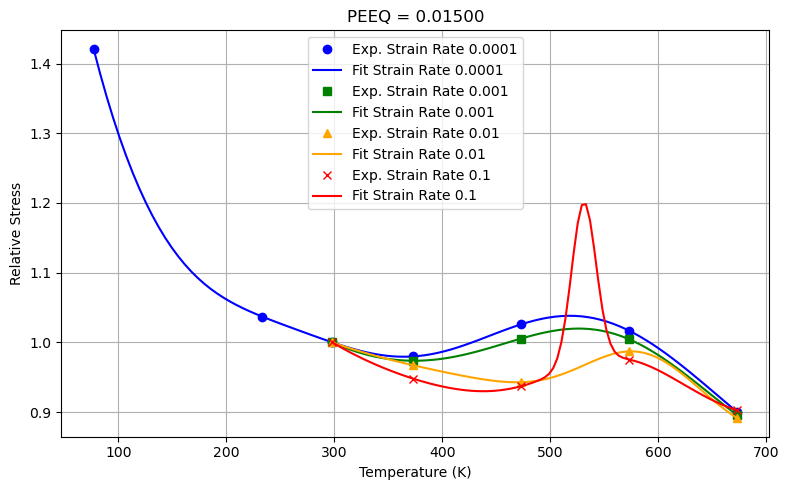

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


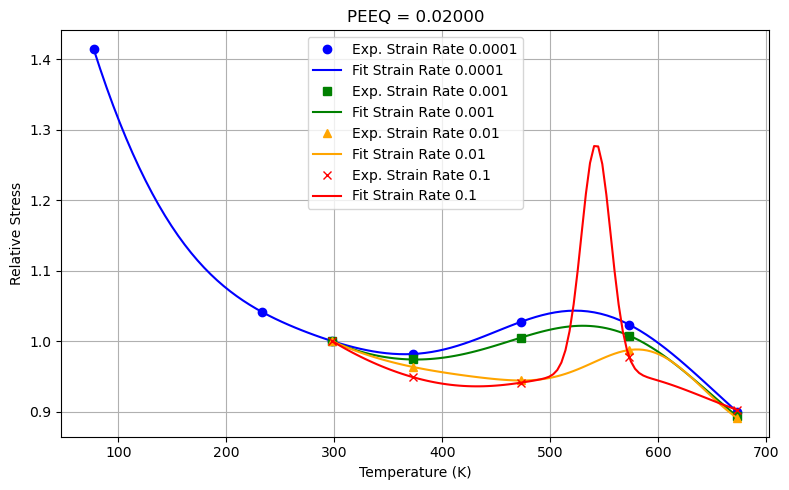

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


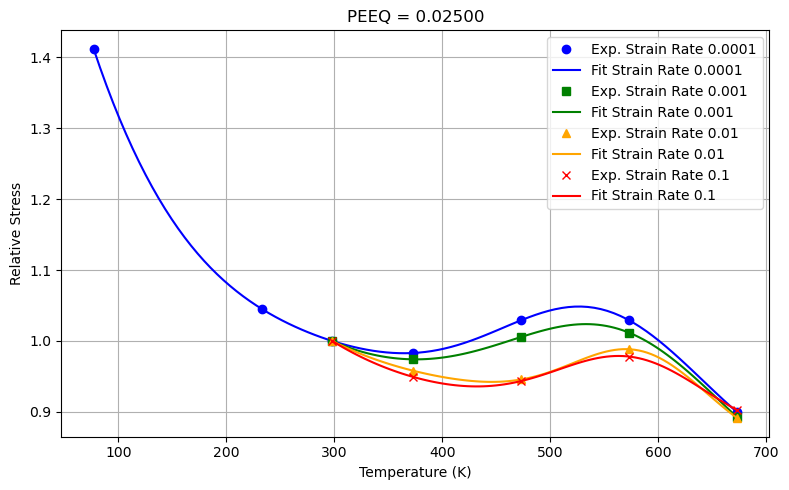

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


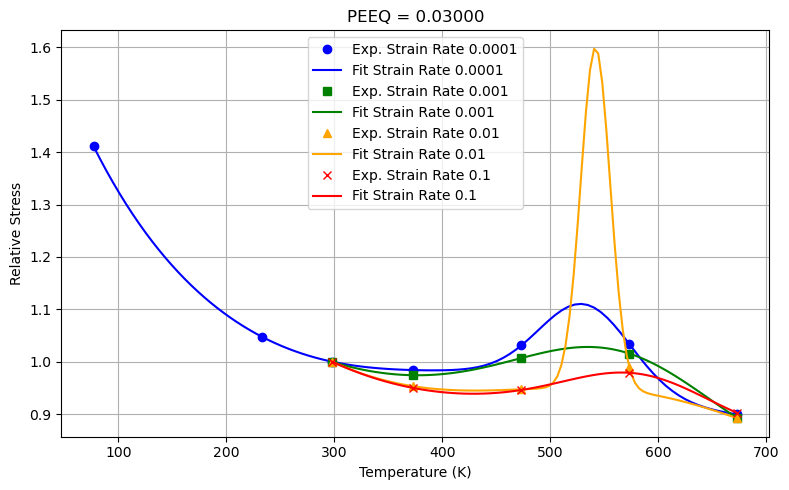

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


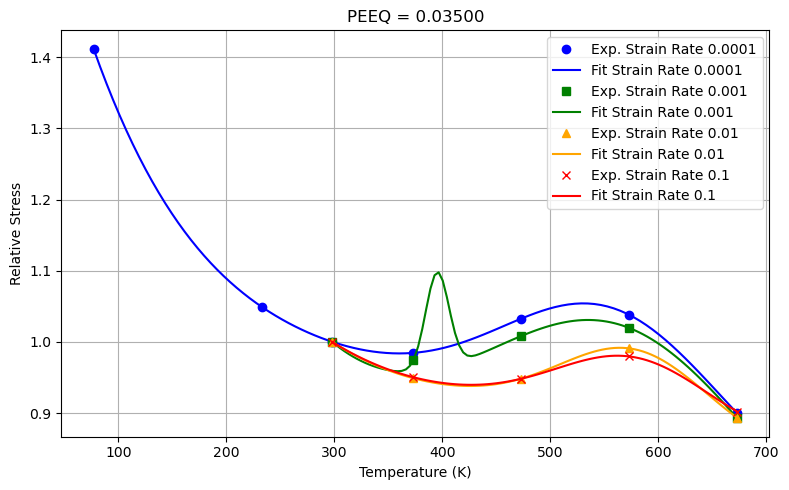

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


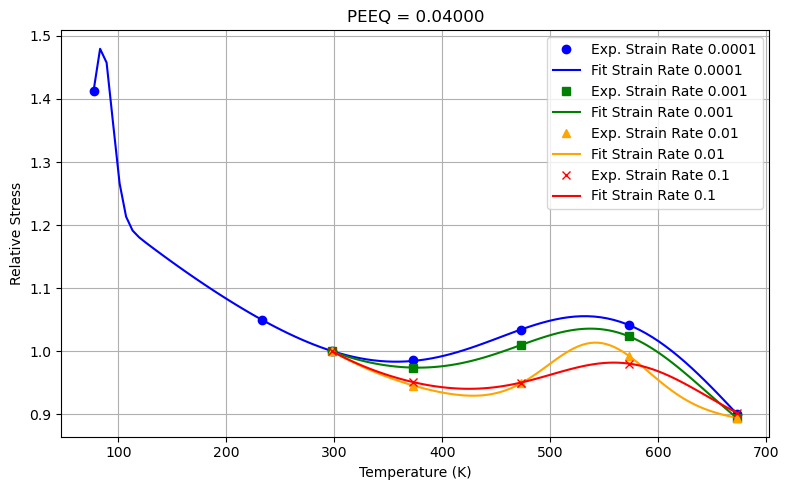

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


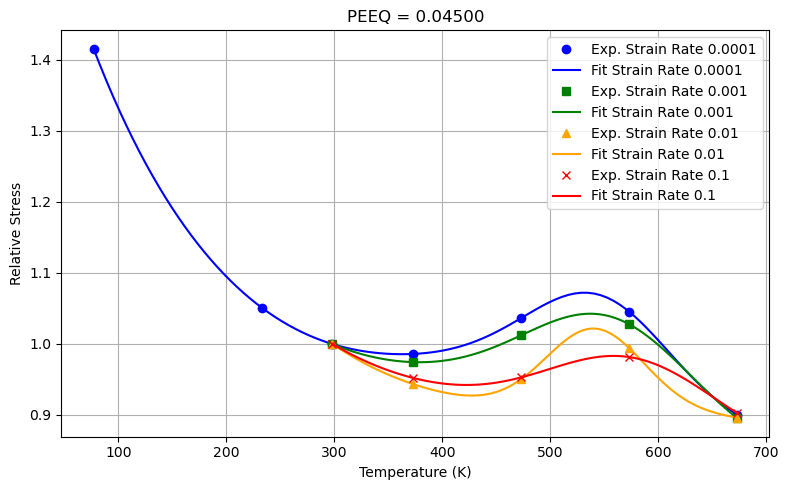

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


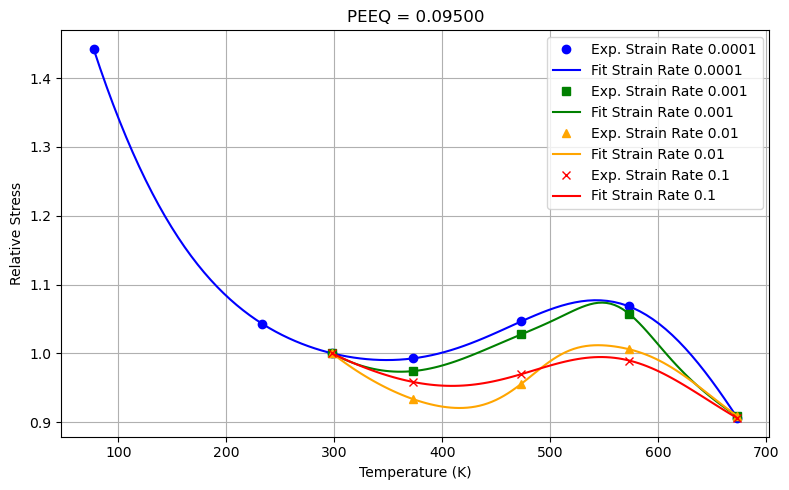

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


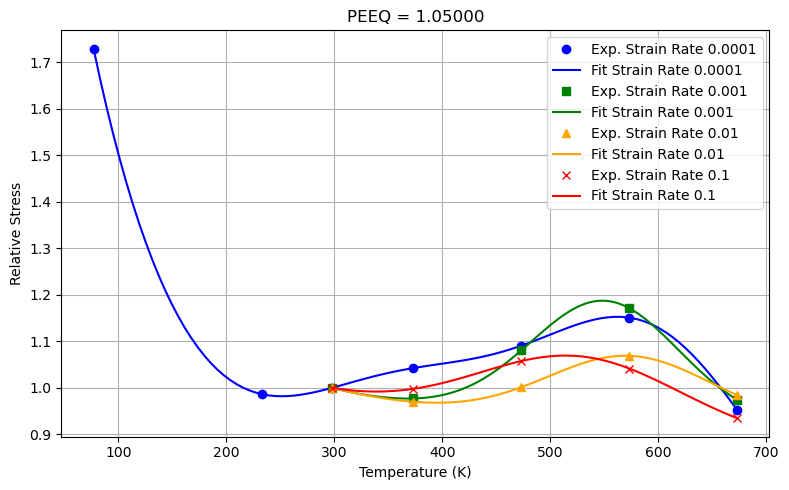

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


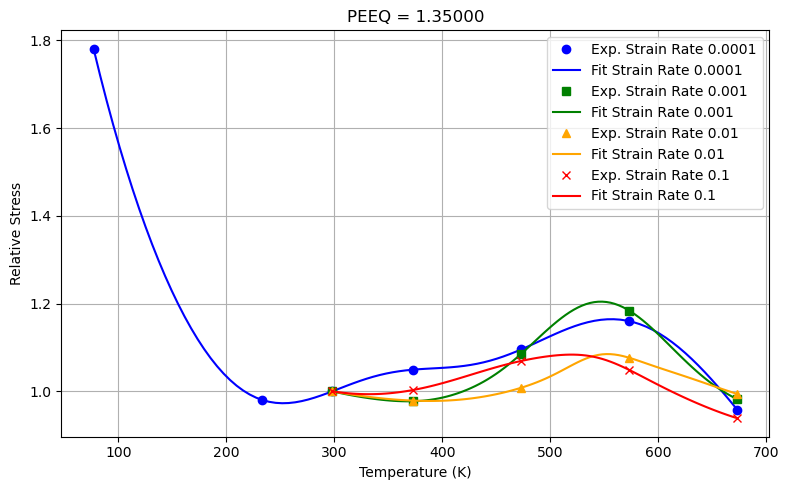

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


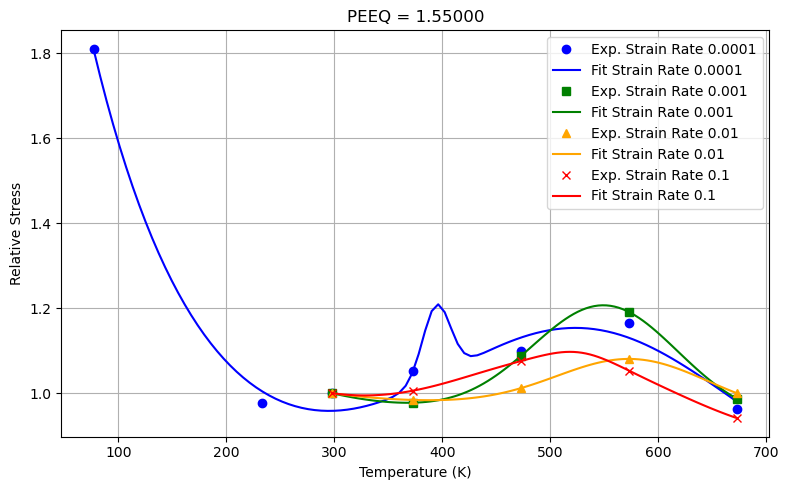

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


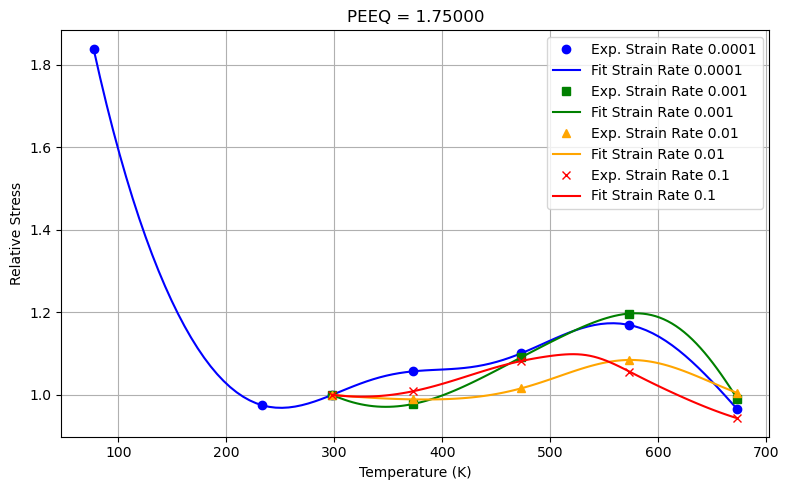

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


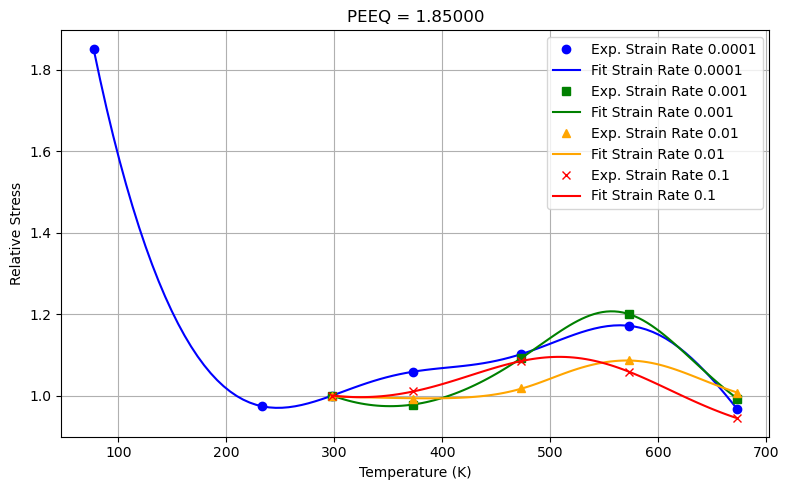

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


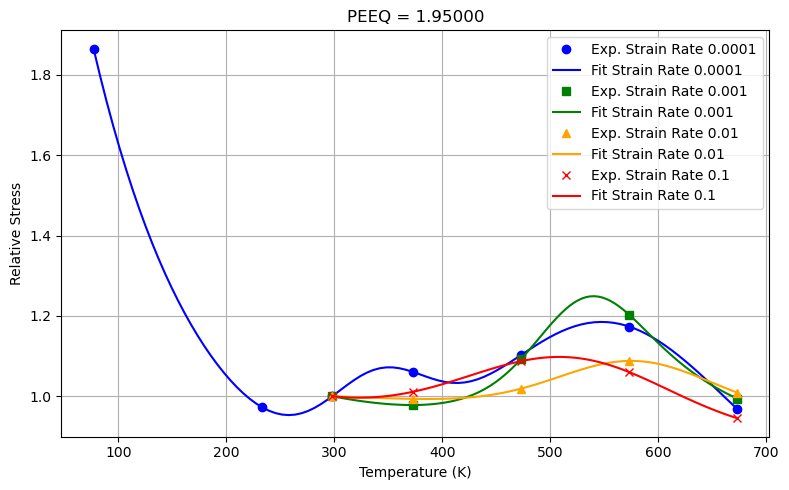

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


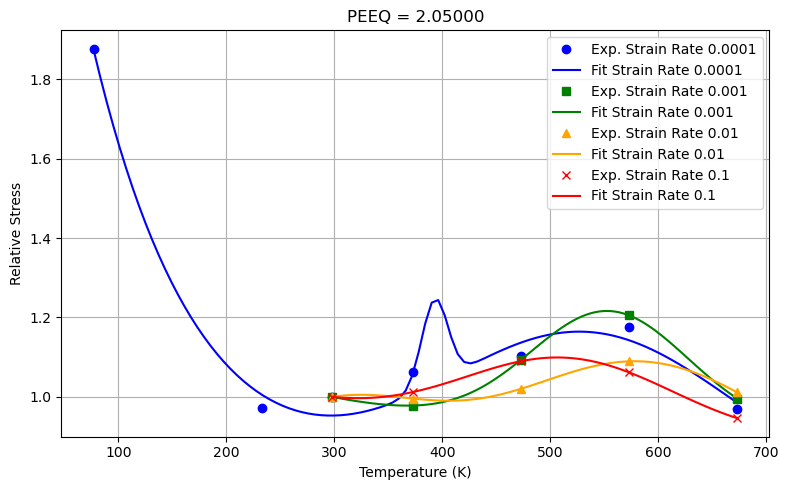

/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


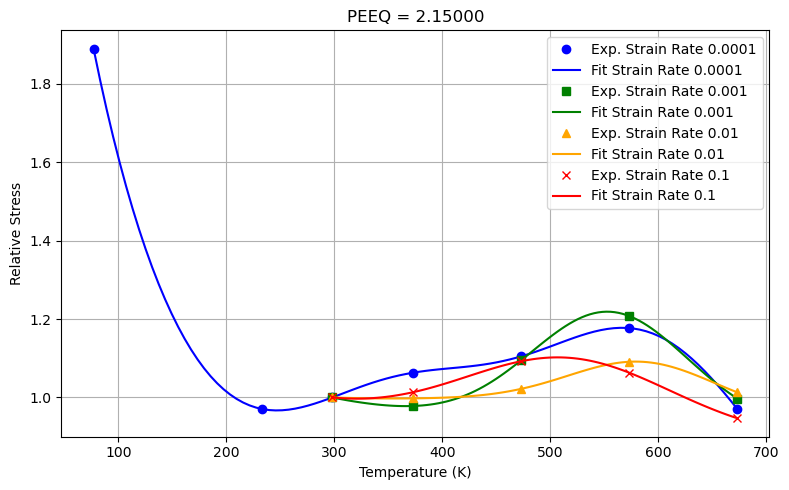

In [79]:
# Load CSV files and extract relevant data

file_0001 = 'Fitted_FC_TmpDpn_RD_StrRt0.0001'
file_001 = 'Fitted_FC_TmpDpn_RD_StrRt0.001'
file_01 = 'Fitted_FC_TmpDpn_RD_StrRt0.01'
file_1 = 'Fitted_FC_TmpDpn_RD_StrRt0.1'

data_0001 = pd.read_csv(f"{file_0001}_ref.csv")
data_001 = pd.read_csv(f"{file_001}_ref.csv")
data_01 = pd.read_csv(f"{file_01}_ref.csv")
data_1 = pd.read_csv(f"{file_1}_ref.csv")


# Define strain indices
strain = np.array([1, 2, 3, 4, 5, 6, 10, 11, 14, 15, 20, 25, 30, 35, 40, 45, 50, 100, 200, 230, 250, 270, 280, 290, 300, 310])

# Define temperature arrays for x-axis
T1 = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])
T2 = np.array([298.15, 373.15, 473.15, 573.15, 673.15])
# Define colors for each strain rate
colors = {
    '0.0001': 'blue',
    '0.001': 'green',
    '0.01': 'orange',
    '0.1': 'red'
}

# Iterate over each strain index and create a separate plot for each
for i in strain:
    plt.figure(figsize=(8, 5))  # Create a new figure for each strain value

    # Plot data points for each strain rate, without connecting lines, using consistent colors
    if i < len(data_0001):
        rate_0001 = data_0001.iloc[i, 8:].values
        plt.plot(T1, rate_0001, 'o', color=colors['0.0001'], label='Exp. Strain Rate 0.0001')
        
        stress_fit_data = fit_data(file_0001, T1, [i], 8)  # Call the fit function
        if i in stress_fit_data:
            T_fit, stress_fit = stress_fit_data[i]
            plt.plot(T_fit, stress_fit, color=colors['0.0001'], label='Fit Strain Rate 0.0001')

    if i < len(data_001):
        rate_001 = data_001.iloc[i, 6:].values
        plt.plot(T2, rate_001, 's', color=colors['0.001'], label='Exp. Strain Rate 0.001')
        
        stress_fit_data = fit_data(file_001, T2, [i], 6)  # Call the fit function with T2
        if i in stress_fit_data:
            T_fit, stress_fit = stress_fit_data[i]
            plt.plot(T_fit, stress_fit, color=colors['0.001'], label='Fit Strain Rate 0.001')

    if i < len(data_01):
        rate_01 = data_01.iloc[i, 6:].values
        plt.plot(T2, rate_01, '^', color=colors['0.01'], label='Exp. Strain Rate 0.01')
        
        stress_fit_data = fit_data(file_01, T2, [i], 6)  # Call the fit function with T2
        if i in stress_fit_data:
            T_fit, stress_fit = stress_fit_data[i]
            plt.plot(T_fit, stress_fit, color=colors['0.01'], label='Fit Strain Rate 0.01')

    if i < len(data_1):
        rate_1 = data_1.iloc[i, 6:].values
        plt.plot(T2, rate_1, 'x', color=colors['0.1'], label='Exp. Strain Rate 0.1')
        
        stress_fit_data = fit_data(file_1, T2, [i], 6)  # Call the fit function with T2
        if i in stress_fit_data:
            T_fit, stress_fit = stress_fit_data[i]
            plt.plot(T_fit, stress_fit, color=colors['0.1'], label='Fit Strain Rate 0.1')

    # Customize plot for each strain index
    plt.xlabel('Temperature (K)')
    plt.ylabel('Relative Stress')
    plt.title(f'PEEQ = {data_0001.iloc[i, 0]:.5f}')  # Assuming data_0001 has PEEQ for each index
    plt.legend(loc='best')
    plt.grid(True)

    # Show plot for the current strain index
    plt.tight_layout()
    plt.show()

## Fit C1-C9

In [7]:
file_0001 = 'Parameters_Fitted_FC_TmpDpn_RD_StrRt0.001'
data = pd.read_csv(f"{file_0001}.csv")

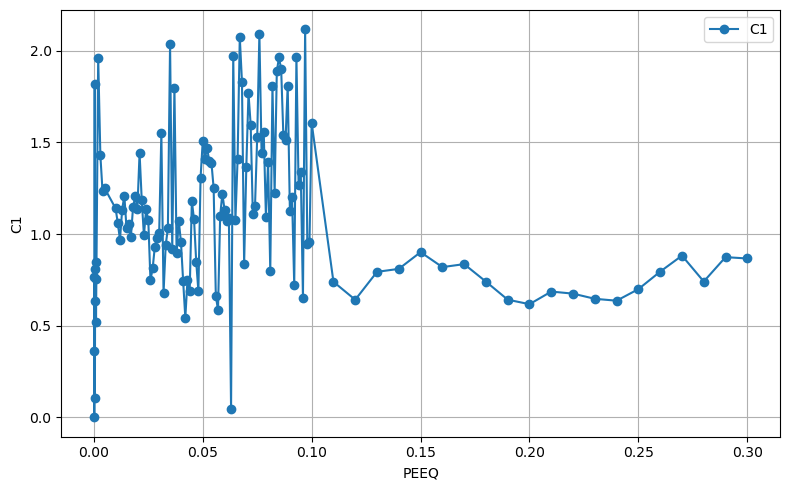

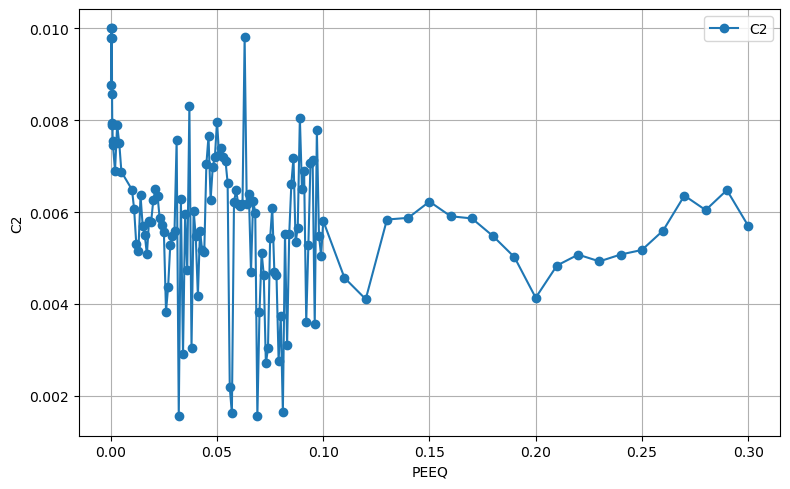

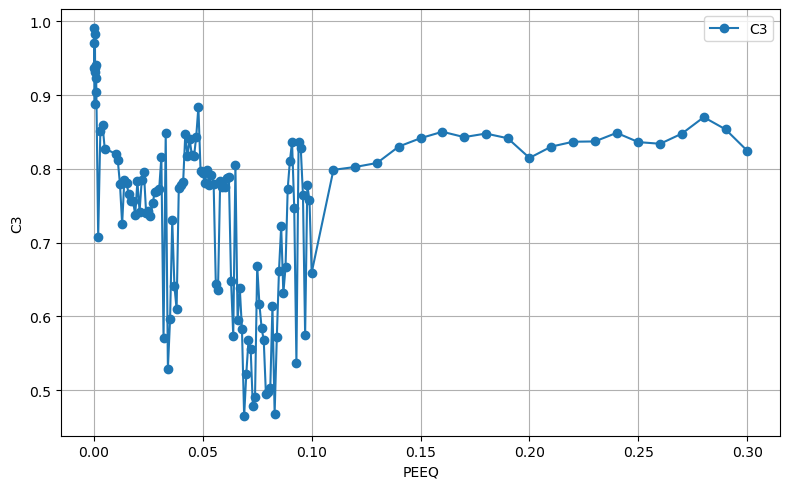

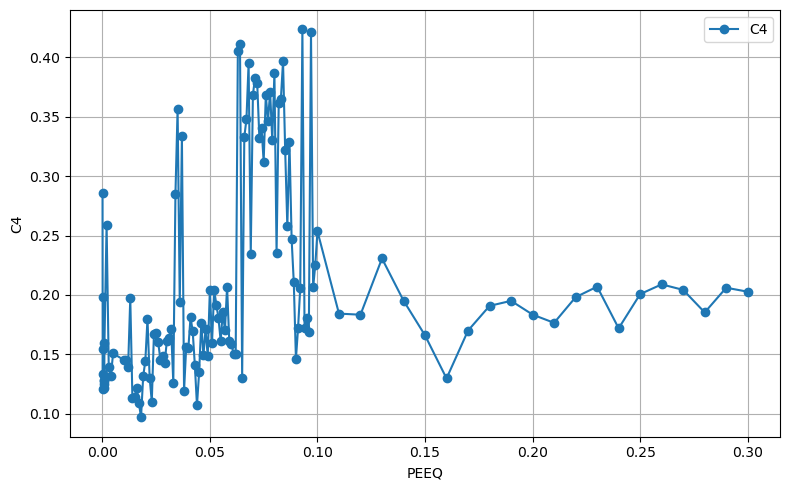

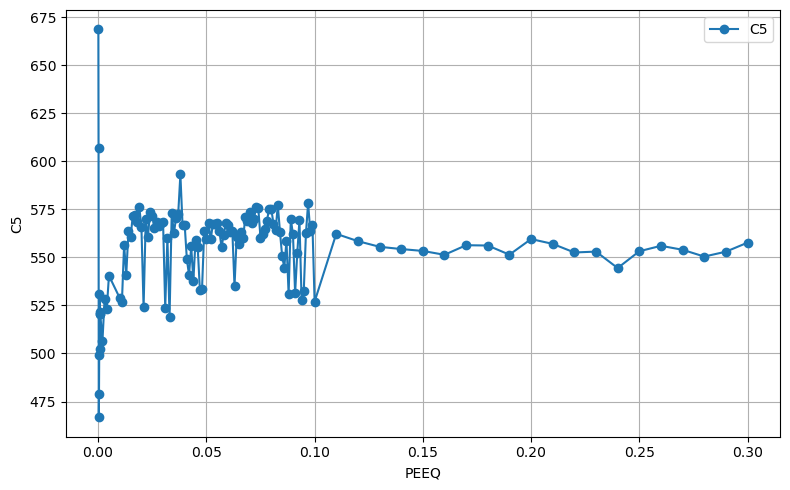

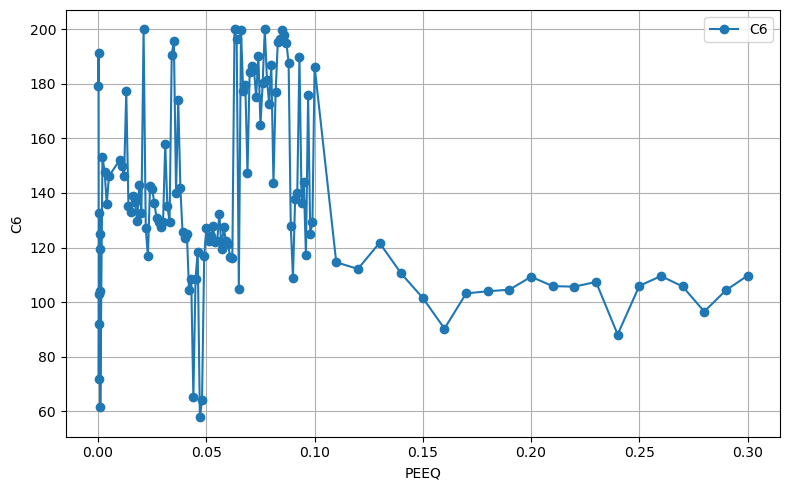

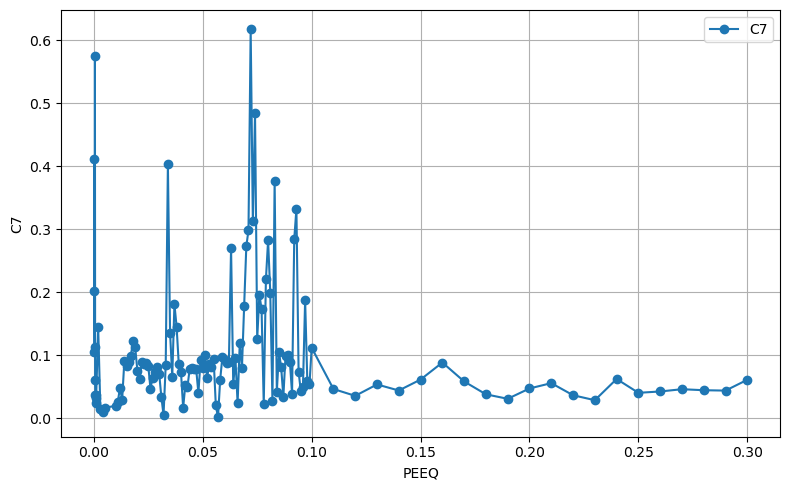

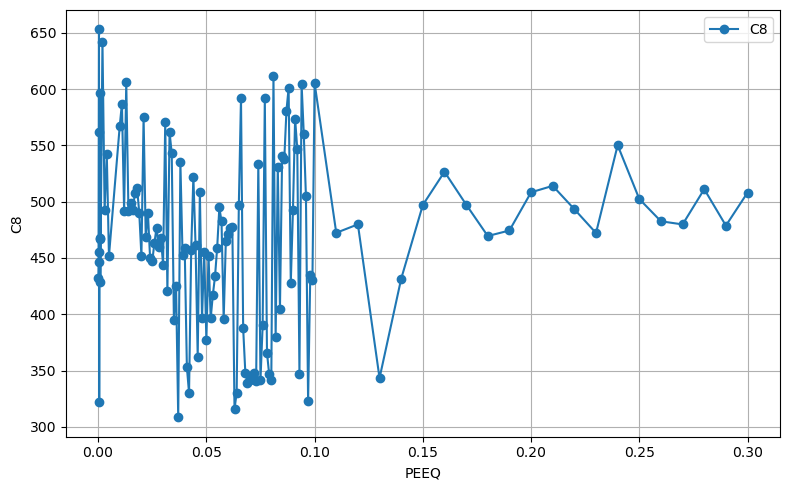

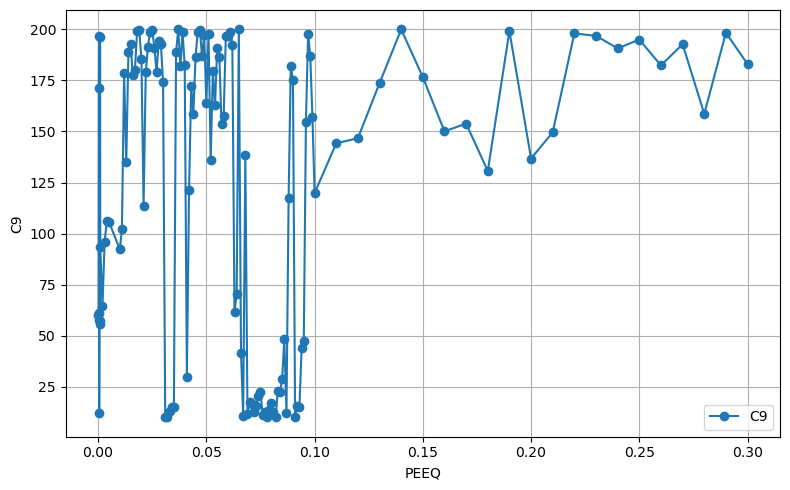

In [9]:
# Specify the column names
x_column = 'PEEQ'
y_columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

# Specify the PEEQ bounds
peeq_lower_bound = 0
peeq_upper_bound = 0.3

# Filter data based on the PEEQ bounds
filtered_data = data[(data[x_column] > peeq_lower_bound) & (data[x_column] <= peeq_upper_bound)]

# Iterate over each y-column and create a plot
for y_column in y_columns:
    plt.figure(figsize=(8, 5))
    plt.plot(filtered_data[x_column], filtered_data[y_column], marker='o', linestyle='-', label=y_column)
    plt.xlabel('PEEQ')
    plt.ylabel(y_column)
    #plt.title(f'{y_column} vs ')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

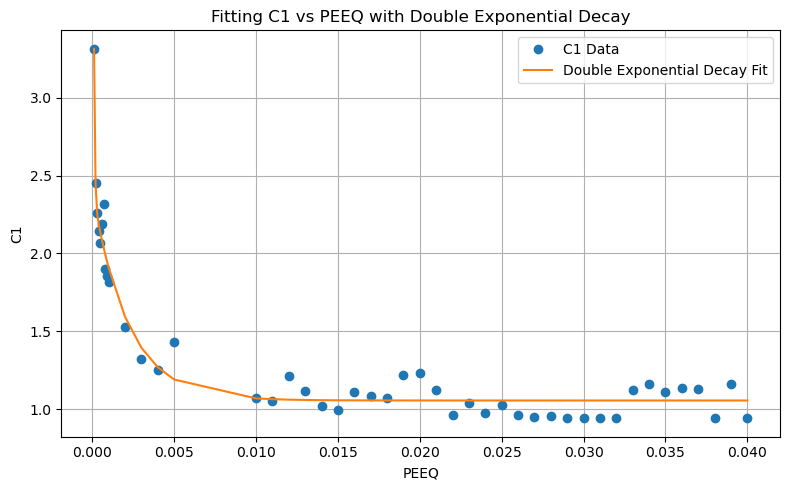

Fitted parameters for C1 (Double Exponential Decay): [8.73161759e+00 1.99473526e+04 1.35450746e+00 4.61660452e+02
 1.05495348e+00]


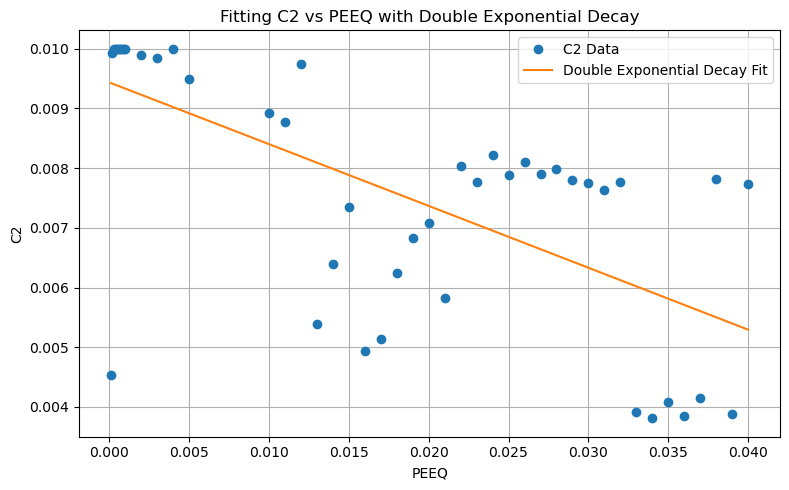

Fitted parameters for C2 (Double Exponential Decay): [-0.44090998 -0.11707698 -0.44116106 -0.11720816  0.89150789]


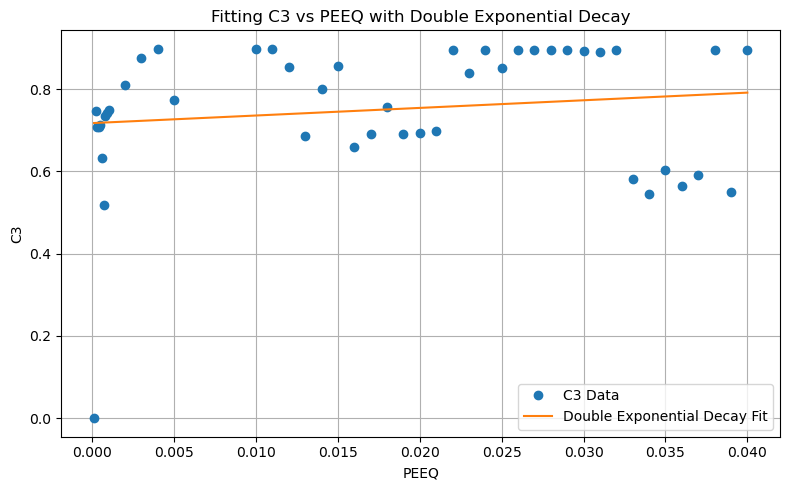

Fitted parameters for C3 (Double Exponential Decay): [ 3.85571485 -0.23766675  3.85754041 -0.23995736 -6.99604837]


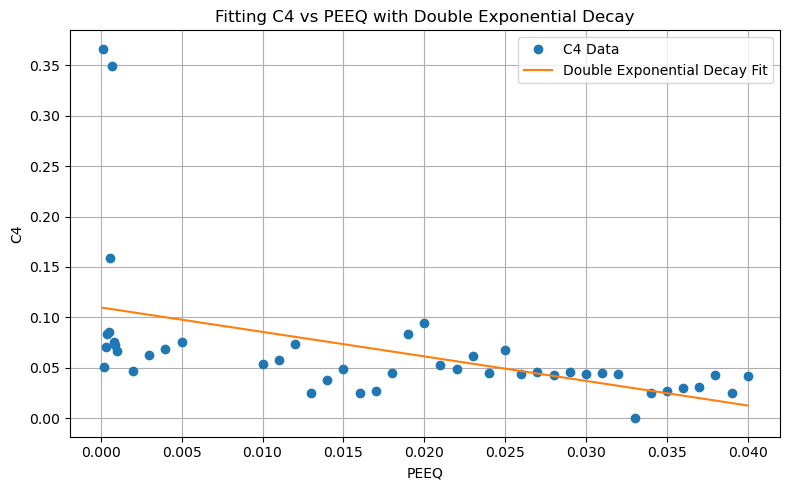

Fitted parameters for C4 (Double Exponential Decay): [-5.54213071 -0.21749821 -5.56980972 -0.2179217  11.2217774 ]


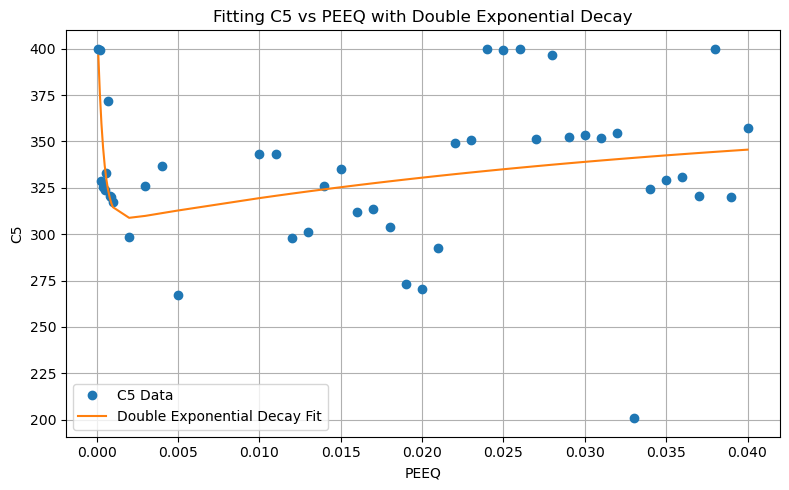

Fitted parameters for C5 (Double Exponential Decay): [ -62.78188369   25.81647308  123.09213281 2755.11011206  367.95540854]


/tmp/ipykernel_302/3900736134.py:21: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * (x - c)**2) + d * np.exp(-e * x) + f


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

In [92]:
# Specify the column names
x_column = 'PEEQ'
y_columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

# Specify the PEEQ bounds
peeq_lower_bound = 0
peeq_upper_bound = 0.04

# Filter data based on the PEEQ bounds
filtered_data = data[(data[x_column] > peeq_lower_bound) & (data[x_column] <= peeq_upper_bound)]


# Define complex functions for fitting
def double_exponential_decay(x, a, b, c, d, e):
    return a * np.exp(-b * x) + c * np.exp(-d * x) + e

def log_exponential(x, a, b, c, d, e):
    return a * np.log(b * x + 1) + c * np.exp(-d * x) + e

def gaussian_exponential(x, a, b, c, d, e, f):
    return a * np.exp(-b * (x - c)**2) + d * np.exp(-e * x) + f

def cosine_exponential_decay(x, a, b, c, d):
    return a * np.cos(b * x) * np.exp(-c * x) + d

# Store fitted parameters for each C column
fitted_params = {}

# Loop through each y_column and fit the data
for y_column in y_columns:
    x_data = filtered_data[x_column].values
    y_data = filtered_data[y_column].values

    # Try fitting with the double exponential decay model
    try:
        params, _ = curve_fit(double_exponential_decay, x_data, y_data, maxfev=10000)
        fitted_params[y_column] = params
        y_fit = double_exponential_decay(x_data, *params)
        model_name = 'Double Exponential Decay'
    except:
        # If double exponential decay fails, try log-exponential fit
        try:
            params, _ = curve_fit(log_exponential, x_data, y_data, maxfev=10000)
            fitted_params[y_column] = params
            y_fit = log_exponential(x_data, *params)
            model_name = 'Logarithmic-Exponential'
        except:
            # If log-exponential fails, try Gaussian-exponential fit
            try:
                params, _ = curve_fit(gaussian_exponential, x_data, y_data, maxfev=10000)
                fitted_params[y_column] = params
                y_fit = gaussian_exponential(x_data, *params)
                model_name = 'Gaussian-Exponential'
            # If Gaussian-exponential fit fails, try cosine_exponential_decay fit
            except: 
                params, _ = curve_fit(gaussian_exponential, x_data, y_data, maxfev=10000)
                fitted_params[y_column] = params
                y_fit = cosine_exponential_decay(x_data, *params)
                model_name = 'cosine_exponential_decay'
    
    # Plot the original data and the fitted curve
    plt.figure(figsize=(8, 5))
    plt.plot(x_data, y_data, 'o', label=f'{y_column} Data')
    plt.plot(x_data, y_fit, '-', label=f'{model_name} Fit')
    plt.xlabel('PEEQ')
    plt.ylabel(y_column)
    plt.title(f'Fitting {y_column} vs PEEQ with {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print the fitted parameters for each y_column
    print(f"Fitted parameters for {y_column} ({model_name}): {params}")
    print(f"Fitted parameters for {y_column} ({model_name}): {params}")

C1: Double Exponential Decay R² = 0.9639


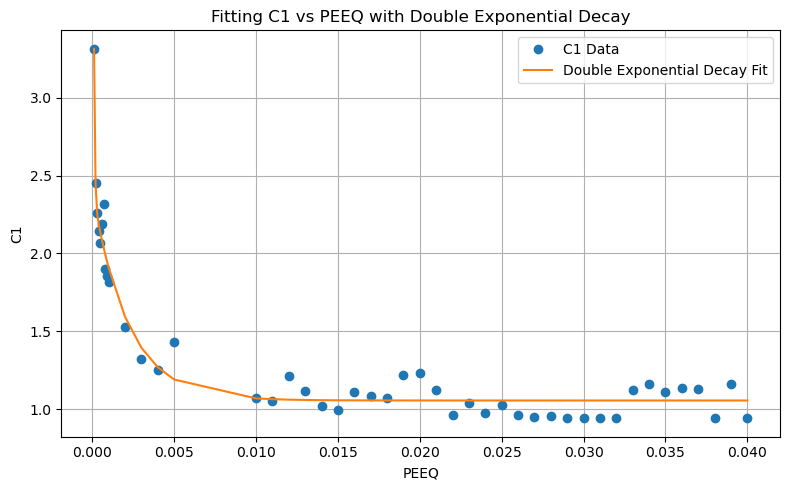

Fitted parameters for C1 (Double Exponential Decay): [8.73161759e+00 1.99473526e+04 1.35450746e+00 4.61660452e+02
 1.05495348e+00]
C2: Double Exponential Decay R² = 0.4331
C2: Logarithmic-Exponential R² = 0.4405


/tmp/ipykernel_302/1648445161.py:6: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x + 1) + c * np.exp(-d * x) + e
/tmp/ipykernel_302/1648445161.py:9: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * (x - c)**2) + d * np.exp(-e * x) + f


C2: Gaussian-Exponential R² = 0.4379
No suitable fit found for C2 with R² >= 0.8
C3: Double Exponential Decay R² = 0.0225
C3: Logarithmic-Exponential R² = 0.3447
C3: Gaussian-Exponential failed
No suitable fit found for C3 with R² >= 0.8
C4: Double Exponential Decay R² = 0.2267
C4: Logarithmic-Exponential R² = 0.5921


/opt/software/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


C4: Gaussian-Exponential R² = 0.2269
No suitable fit found for C4 with R² >= 0.8
C5: Double Exponential Decay R² = 0.1582
C5: Logarithmic-Exponential R² = 0.0939
C5: Gaussian-Exponential failed
No suitable fit found for C5 with R² >= 0.8
C6: Double Exponential Decay failed
C6: Logarithmic-Exponential failed
C6: Gaussian-Exponential failed
No suitable fit found for C6 with R² >= 0.8
C7: Double Exponential Decay R² = 0.0654
C7: Logarithmic-Exponential R² = 0.7939
C7: Gaussian-Exponential R² = 0.0655
No suitable fit found for C7 with R² >= 0.8
C8: Double Exponential Decay R² = 0.0953
C8: Logarithmic-Exponential R² = 0.1397
C8: Gaussian-Exponential failed
No suitable fit found for C8 with R² >= 0.8
C9: Double Exponential Decay R² = 0.2400
C9: Logarithmic-Exponential R² = 0.3282
C9: Gaussian-Exponential R² = 0.2400
No suitable fit found for C9 with R² >= 0.8


In [94]:
# Define complex functions for fitting
def double_exponential_decay(x, a, b, c, d, e):
    return a * np.exp(-b * x) + c * np.exp(-d * x) + e

def log_exponential(x, a, b, c, d, e):
    return a * np.log(b * x + 1) + c * np.exp(-d * x) + e

def gaussian_exponential(x, a, b, c, d, e, f):
    return a * np.exp(-b * (x - c)**2) + d * np.exp(-e * x) + f

# Function to calculate R-squared
def calculate_r_squared(y_data, y_fit):
    residuals = y_data - y_fit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_data - np.mean(y_data))**2)
    return 1 - (ss_res / ss_tot)

# Set the R-squared threshold
r_squared_threshold = 0.8

# Store fitted parameters for each C column
fitted_params = {}

# Loop through each y_column and fit the data
for y_column in y_columns:
    x_data = filtered_data[x_column].values
    y_data = filtered_data[y_column].values
    best_fit = False

    # Try fitting with the double exponential decay model
    try:
        params, _ = curve_fit(double_exponential_decay, x_data, y_data, maxfev=10000)
        y_fit = double_exponential_decay(x_data, *params)
        r_squared = calculate_r_squared(y_data, y_fit)
        if r_squared >= r_squared_threshold:
            fitted_params[y_column] = params
            model_name = 'Double Exponential Decay'
            best_fit = True
        print(f"{y_column}: Double Exponential Decay R² = {r_squared:.4f}")
    except:
        print(f"{y_column}: Double Exponential Decay failed")

    # If R² is below the threshold, try the log-exponential model
    if not best_fit:
        try:
            params, _ = curve_fit(log_exponential, x_data, y_data, maxfev=10000)
            y_fit = log_exponential(x_data, *params)
            r_squared = calculate_r_squared(y_data, y_fit)
            if r_squared >= r_squared_threshold:
                fitted_params[y_column] = params
                model_name = 'Logarithmic-Exponential'
                best_fit = True
            print(f"{y_column}: Logarithmic-Exponential R² = {r_squared:.4f}")
        except:
            print(f"{y_column}: Logarithmic-Exponential failed")

    # If still below threshold, try the Gaussian-exponential model
    if not best_fit:
        try:
            params, _ = curve_fit(gaussian_exponential, x_data, y_data, maxfev=10000)
            y_fit = gaussian_exponential(x_data, *params)
            r_squared = calculate_r_squared(y_data, y_fit)
            if r_squared >= r_squared_threshold:
                fitted_params[y_column] = params
                model_name = 'Gaussian-Exponential'
                best_fit = True
            print(f"{y_column}: Gaussian-Exponential R² = {r_squared:.4f}")
        except:
            print(f"{y_column}: Gaussian-Exponential failed")

    # Plot the original data and the fitted curve if a suitable fit was found
    if best_fit:
        plt.figure(figsize=(8, 5))
        plt.plot(x_data, y_data, 'o', label=f'{y_column} Data')
        plt.plot(x_data, y_fit, '-', label=f'{model_name} Fit')
        plt.xlabel('PEEQ')
        plt.ylabel(y_column)
        plt.title(f'Fitting {y_column} vs PEEQ with {model_name}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Print the fitted parameters for each y_column
        print(f"Fitted parameters for {y_column} ({model_name}): {params}")
    else:
        print(f"No suitable fit found for {y_column} with R² >= {r_squared_threshold}")

C1: Double Gaussian R² = 0.8914


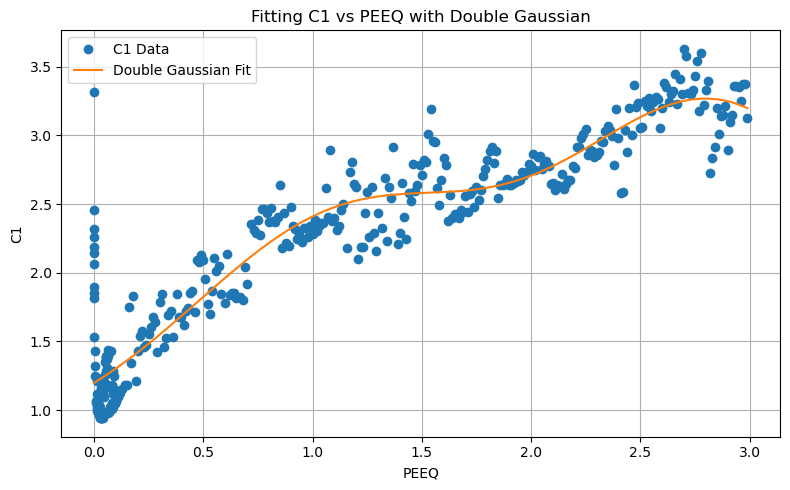

Fitted parameters for C1 (Double Gaussian): [1.60617031 1.16192113 1.02619623 2.39829987 2.87930205 1.02826179
 0.76658826]
C2: Double Gaussian R² = 0.2588
C2: Polynomial-Exponential R² = 0.0724
C2: Sine-Exponential R² = 0.0724
C2: Spline Interpolation R² = 0.0667


/tmp/ipykernel_302/3321575983.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-((x - b)**2 / c)) + d * np.exp(-((x - e)**2 / f)) + g


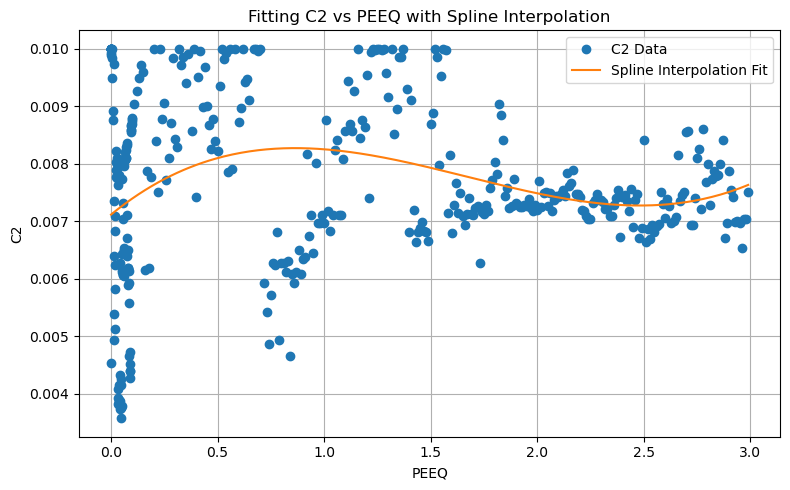

C3: Double Gaussian R² = 0.6691
C3: Polynomial-Exponential R² = 0.6294
C3: Sine-Exponential R² = 0.6225
C3: Spline Interpolation R² = 0.9657


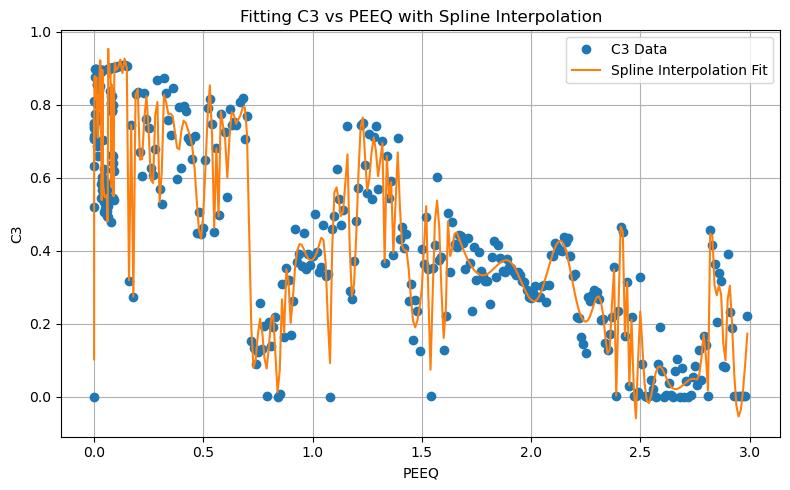

C4: Double Gaussian failed
C4: Polynomial-Exponential R² = 0.6297
C4: Sine-Exponential R² = 0.5863
C4: Spline Interpolation R² = 0.9138


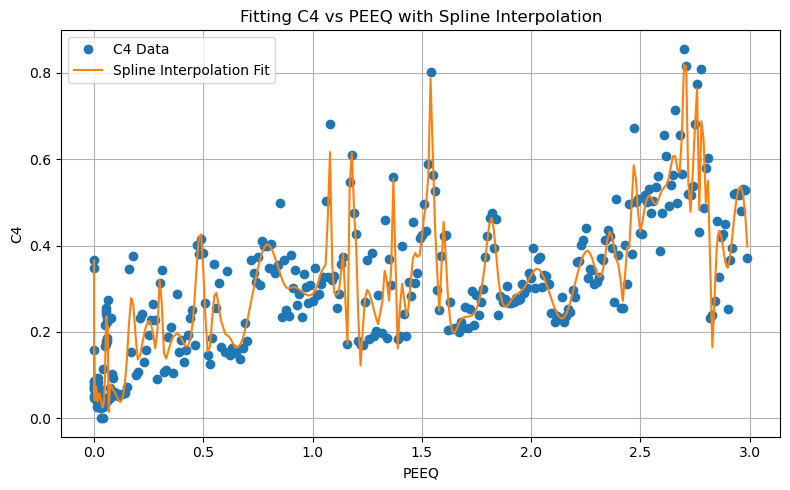

C5: Double Gaussian R² = 0.0907
C5: Polynomial-Exponential R² = 0.1154
C5: Sine-Exponential R² = 0.1325
C5: Spline Interpolation R² = 1.0000


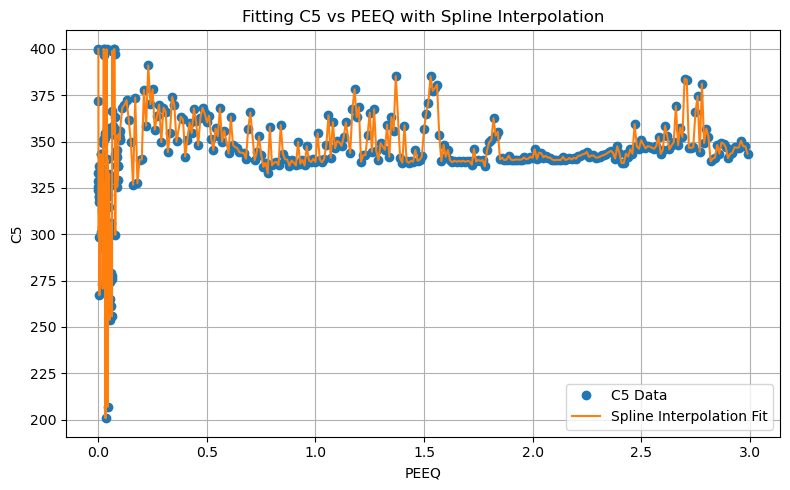

C6: Double Gaussian R² = 0.1560
C6: Polynomial-Exponential R² = 0.1567
C6: Sine-Exponential R² = 0.1392
C6: Spline Interpolation R² = 1.0000


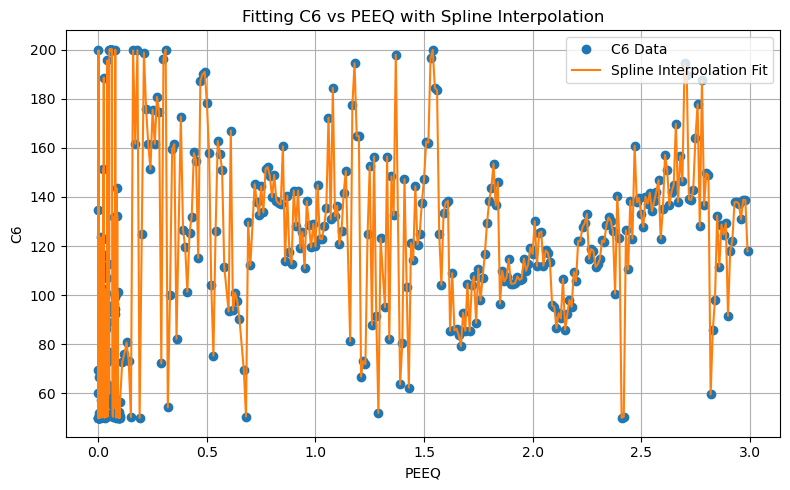

C7: Double Gaussian R² = 0.8262


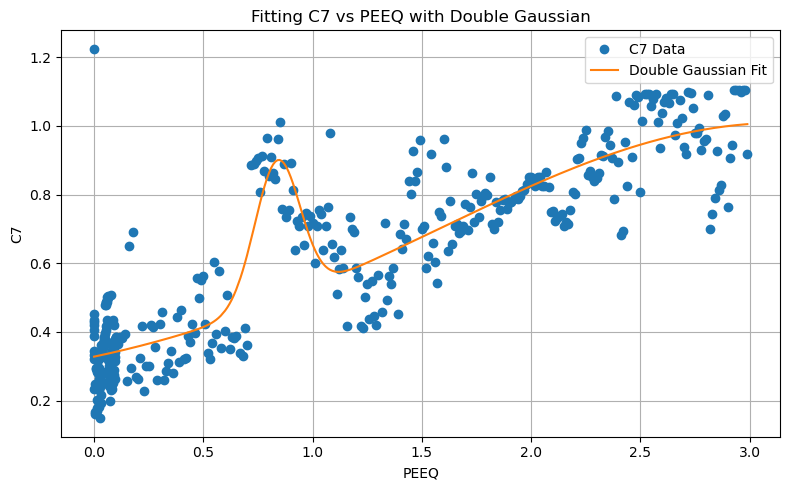

Fitted parameters for C7 (Double Gaussian): [0.41090717 0.83943737 0.02154508 0.78642887 3.14470807 4.91452931
 0.22265652]
C8: Double Gaussian failed
C8: Polynomial-Exponential R² = 0.5138
C8: Sine-Exponential R² = 0.4845
C8: Spline Interpolation R² = 1.0000


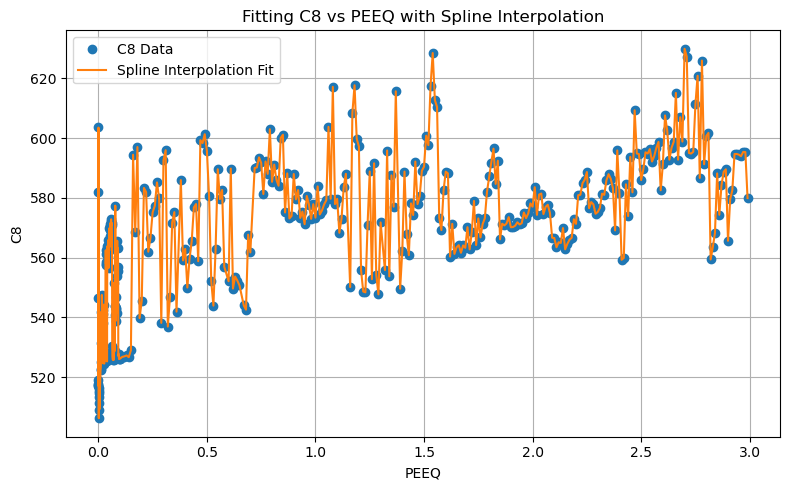

C9: Double Gaussian R² = 0.0000
C9: Polynomial-Exponential R² = 0.3691
C9: Sine-Exponential R² = 0.0815
C9: Spline Interpolation R² = 1.0000


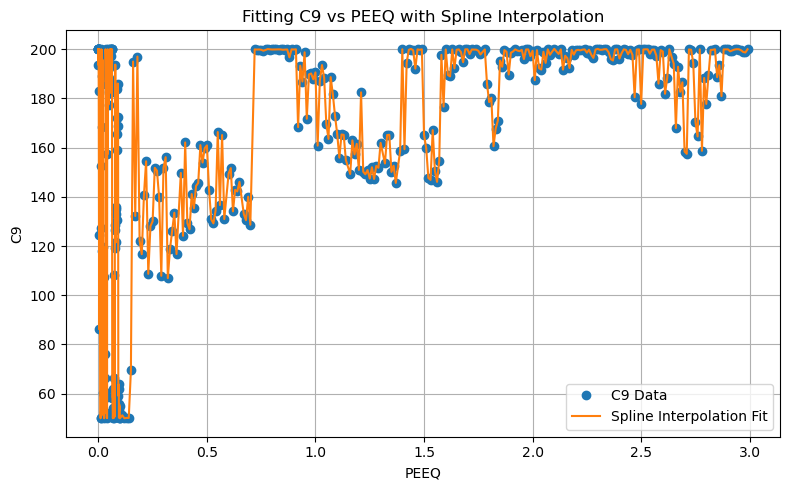

In [98]:
def double_gaussian(x, a, b, c, d, e, f, g):
    return a * np.exp(-((x - b)**2 / c)) + d * np.exp(-((x - e)**2 / f)) + g

def polynomial_exponential(x, a, b, c, d, e):
    return (a * x**2 + b * x + c) * np.exp(-d * x) + e

def sine_exponential(x, a, b, c, d, e):
    return a * np.sin(b * x + c) * np.exp(-d * x) + e

# Function to calculate R-squared
def calculate_r_squared(y_data, y_fit):
    residuals = y_data - y_fit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_data - np.mean(y_data))**2)
    return 1 - (ss_res / ss_tot)

# Set the R-squared threshold
r_squared_threshold = 0.8

# Store fitted parameters for each C column
fitted_params = {}

# Loop through each y_column and fit the data
for y_column in y_columns:
    x_data = data[x_column].values
    y_data = data[y_column].values
    best_fit = False

    # Try fitting with the double Gaussian model
    try:
        params, _ = curve_fit(double_gaussian, x_data, y_data, maxfev=10000)
        y_fit = double_gaussian(x_data, *params)
        r_squared = calculate_r_squared(y_data, y_fit)
        if r_squared >= r_squared_threshold:
            fitted_params[y_column] = params
            model_name = 'Double Gaussian'
            best_fit = True
        print(f"{y_column}: Double Gaussian R² = {r_squared:.4f}")
    except:
        print(f"{y_column}: Double Gaussian failed")

    # If R² is below the threshold, try the polynomial-exponential model
    if not best_fit:
        try:
            params, _ = curve_fit(polynomial_exponential, x_data, y_data, maxfev=10000)
            y_fit = polynomial_exponential(x_data, *params)
            r_squared = calculate_r_squared(y_data, y_fit)
            if r_squared >= r_squared_threshold:
                fitted_params[y_column] = params
                model_name = 'Polynomial-Exponential'
                best_fit = True
            print(f"{y_column}: Polynomial-Exponential R² = {r_squared:.4f}")
        except:
            print(f"{y_column}: Polynomial-Exponential failed")

    # If still below threshold, try the sine-exponential model
    if not best_fit:
        try:
            params, _ = curve_fit(sine_exponential, x_data, y_data, maxfev=10000)
            y_fit = sine_exponential(x_data, *params)
            r_squared = calculate_r_squared(y_data, y_fit)
            if r_squared >= r_squared_threshold:
                fitted_params[y_column] = params
                model_name = 'Sine-Exponential'
                best_fit = True
            print(f"{y_column}: Sine-Exponential R² = {r_squared:.4f}")
        except:
            print(f"{y_column}: Sine-Exponential failed")

    # If none of the functions work, try a spline interpolation as a fallback
    if not best_fit:
        spline = UnivariateSpline(x_data, y_data, s=1)
        y_fit = spline(x_data)
        r_squared = calculate_r_squared(y_data, y_fit)
        model_name = 'Spline Interpolation'
        best_fit = True
        print(f"{y_column}: Spline Interpolation R² = {r_squared:.4f}")

    # Plot the original data and the fitted curve if a suitable fit was found
    if best_fit:
        plt.figure(figsize=(8, 5))
        plt.plot(x_data, y_data, 'o', label=f'{y_column} Data')
        plt.plot(x_data, y_fit, '-', label=f'{model_name} Fit')
        plt.xlabel('PEEQ')
        plt.ylabel(y_column)
        plt.title(f'Fitting {y_column} vs PEEQ with {model_name}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Print the fitted parameters for each y_column
        if model_name != 'Spline Interpolation':
            print(f"Fitted parameters for {y_column} ({model_name}): {params}")
    else:
        print(f"No suitable fit found for {y_column} with R² >= {r_squared_threshold}")

C1: Custom Rational-Exponential Form R² = 0.9444


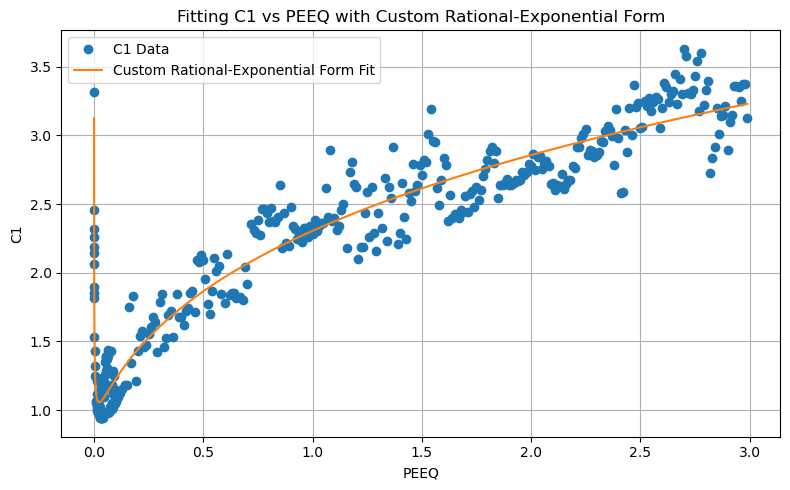

Fitted parameters for C1 (Custom Rational-Exponential Form): [-2.69697880e+03  6.07099201e-01  2.42489446e-04 -1.38932879e+00
  2.70001954e+03  3.92774504e-01]
C2: Custom Rational-Exponential Form failed to meet R² >= 0.8
C3: Custom Rational-Exponential Form failed to meet R² >= 0.8
C4: Fitting failed for Custom Rational-Exponential Form
C5: Fitting failed for Custom Rational-Exponential Form
C6: Custom Rational-Exponential Form failed to meet R² >= 0.8
C7: Custom Rational-Exponential Form failed to meet R² >= 0.8
C8: Custom Rational-Exponential Form failed to meet R² >= 0.8
C9: Fitting failed for Custom Rational-Exponential Form


In [99]:
# Define the custom function with a rational component and exponential term
def custom_function(epsilon, a, b, c, d, e, f):
    return (a * epsilon) / (epsilon**b + c) + d + e * epsilon**f

# Function to calculate R-squared
def calculate_r_squared(y_data, y_fit):
    residuals = y_data - y_fit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_data - np.mean(y_data))**2)
    return 1 - (ss_res / ss_tot)

# Set the R-squared threshold
r_squared_threshold = 0.8

# Store fitted parameters for each C column
fitted_params = {}

# Loop through each y_column and fit the data
for y_column in y_columns:
    x_data = data[x_column].values
    y_data = data[y_column].values

    # Try fitting with the custom function
    try:
        # Initial guesses for parameters can be based on observed behavior; adjust as needed
        initial_guess = [-0.46, 1.06, 0.0033, 0.057, 2.23, 0.037]
        params, _ = curve_fit(custom_function, x_data, y_data, p0=initial_guess, maxfev=10000)
        y_fit = custom_function(x_data, *params)
        r_squared = calculate_r_squared(y_data, y_fit)

        if r_squared >= r_squared_threshold:
            fitted_params[y_column] = params
            model_name = 'Custom Rational-Exponential Form'
            print(f"{y_column}: {model_name} R² = {r_squared:.4f}")

            # Plot the original data and the fitted curve
            plt.figure(figsize=(8, 5))
            plt.plot(x_data, y_data, 'o', label=f'{y_column} Data')
            plt.plot(x_data, y_fit, '-', label=f'{model_name} Fit')
            plt.xlabel('PEEQ')
            plt.ylabel(y_column)
            plt.title(f'Fitting {y_column} vs PEEQ with {model_name}')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

            # Print the fitted parameters
            print(f"Fitted parameters for {y_column} ({model_name}): {params}")
        else:
            print(f"{y_column}: {model_name} failed to meet R² >= {r_squared_threshold}")
    except RuntimeError:
        print(f"{y_column}: Fitting failed for {model_name}")